<a href="https://colab.research.google.com/github/dev0419/Pytorch_FreeCodeCamp/blob/main/custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset,DataLoader

In [100]:
import requests
import zipfile
from pathlib import Path

data_pth = Path('data/')
img_pth = data_pth / "pizza_steak_sushi"
if img_pth.is_dir():
    print(f"{img_pth} directory exists")
else:
    print(f"Did not find {img_pth} directory creating one....")
    img_pth.mkdir(parents=True,exist_ok=True)

with open(data_pth / "pizza_steak_sushi.zip","wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print(f"Downloading pizza,steak, sushi data....")
    f.write(request.content)

with zipfile.ZipFile(data_pth / "pizza_steak_sushi.zip", "r") as zip_ref:
    print(f"Unzipping the pizzaa, steak,sushi data .....")
    zip_ref.extractall(img_pth)


data/pizza_steak_sushi directory exists
Unzipping the pizzaa, steak,sushi data .....


In [101]:
import os

def walk_through_dir(dir_pth):
    for dirpath,dirnames,filenames in os.walk(dir_pth):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ")

In [102]:
walk_through_dir(data_pth)

There are 1 directories and 1 images in data 
There are 2 directories and 0 images in data/pizza_steak_sushi 
There are 3 directories and 0 images in data/pizza_steak_sushi/test 
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi 
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza 
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak 
There are 3 directories and 0 images in data/pizza_steak_sushi/train 
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi 
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza 
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak 


In [103]:
walk_through_dir(img_pth)

There are 2 directories and 0 images in data/pizza_steak_sushi 
There are 3 directories and 0 images in data/pizza_steak_sushi/test 
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi 
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza 
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak 
There are 3 directories and 0 images in data/pizza_steak_sushi/train 
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi 
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza 
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak 


In [104]:
train_dir = img_pth / "train"
test_dir = img_pth / "test"
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/test/steak/296375.jpg
Image class: steak
Image height: 512
Image width: 382


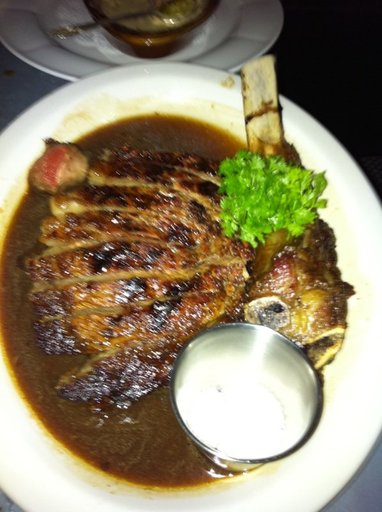

In [105]:
import random
from PIL import Image

random.seed(42)
img_pth_list = list(img_pth.glob("*/*/*.jpg"))
random_img_pth= random.choice(img_pth_list)
img_class  = random_img_pth.parent.stem
img = Image.open(random_img_pth)
print(f"Random image path: {random_img_pth}")
print(f"Image class: {img_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 381.5, 511.5, -0.5)

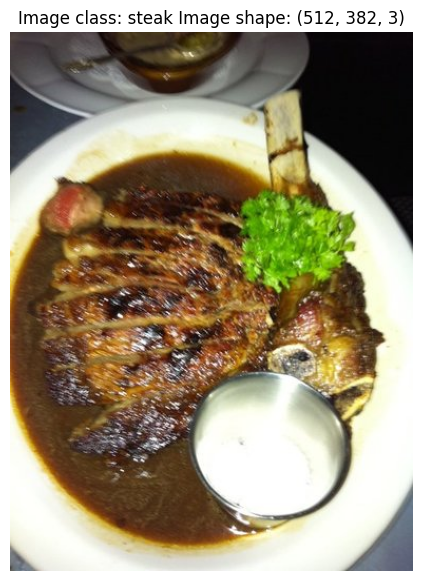

In [106]:
import matplotlib.pyplot as plt
import numpy as np

img_arr = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_arr)
plt.title(f"Image class: {img_class} Image shape: {img_arr.shape}")
plt.axis("off")

In [107]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

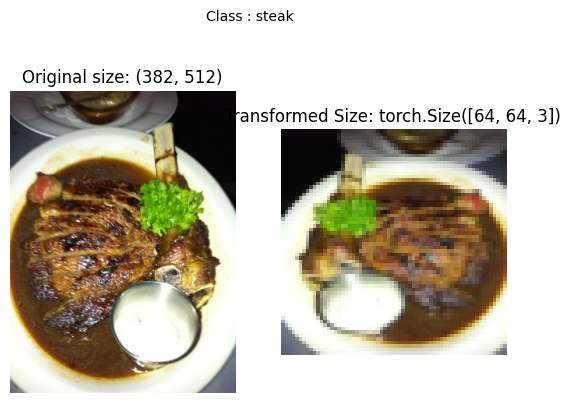

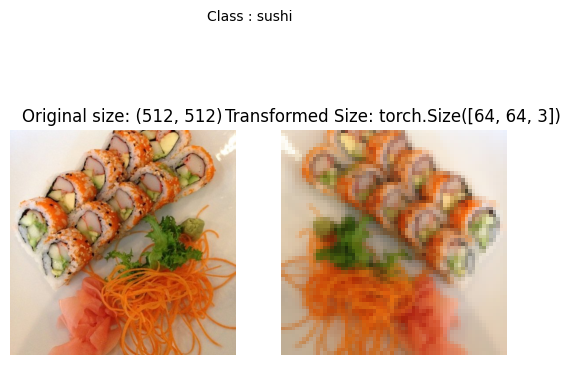

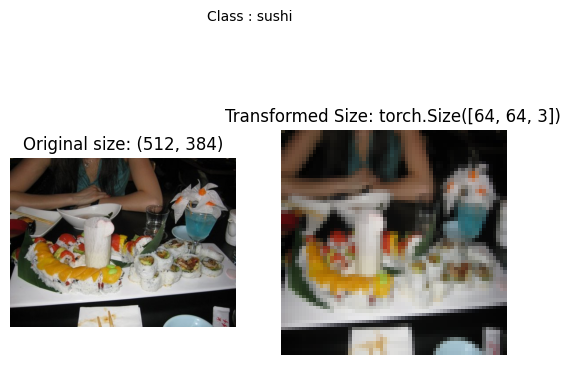

In [108]:
def plot_transformed_image(img_pths,transform,n=3,seed=42):
    random.seed(seed)
    random_img_pths = random.sample(img_pths,k=n)
    for img_pth in random_img_pths:
        with Image.open(img_pth) as f:
            fig,ax = plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original size: {f.size}")
            ax[0].axis("off")
            transformed_img = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_img)
            ax[1].set_title(f"Transformed Size: {transformed_img.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class : {img_pth.parent.stem}", fontsize=10)

plot_transformed_image(img_pth_list ,transform=data_transform,n=3)



In [109]:
train_data = datasets.ImageFolder(root=train_dir,transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,transform=data_transform)
print(f"Train data: {train_data}\n Test data:{test_data}")

Train data: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
 Test data:Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [110]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [111]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [112]:
len(train_data),len(test_data)

(225, 75)

In [113]:
img,label = train_data[0][0],train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype:{img.dtype}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Original shape:torch.Size([3, 64, 64])
Permutted shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

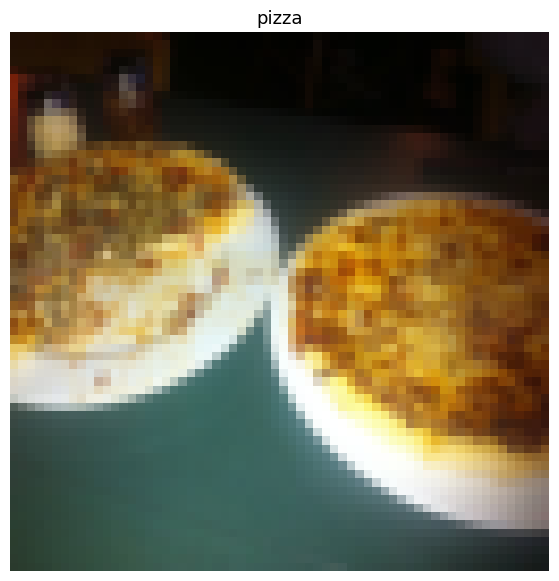

In [114]:
img_permute = img.permute(1,2,0)
print(f"Original shape:{img.shape}")
print(f"Permutted shape: {img_permute.shape}")
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label],fontsize=13)

In [115]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=train_data,batch_size=1,num_workers=1,shuffle=True)
test_loader = DataLoader(dataset=test_data,batch_size=1,num_workers=1)
train_loader,test_loader

(<torch.utils.data.dataloader.DataLoader at 0x77fce9cd3940>,
 <torch.utils.data.dataloader.DataLoader at 0x77fce9cd3f10>)

In [116]:
img,label = next(iter(train_loader))
print(f"image shape: {img.shape}")
print(f"label shape: {label.shape}")

image shape: torch.Size([1, 3, 64, 64])
label shape: torch.Size([1])


In [117]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [118]:
train_data.classes,train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [119]:
target_dir = train_dir
print(f"Train directory: {target_dir}")
class_names_found = sorted([entry.name for entry in list(os.scandir(img_pth / "train"))])
print(f"Class names found: {class_names_found}")

Train directory: data/pizza_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


In [120]:
def find_classes(dir):
    classes = sorted(entry.name for entry in os.scandir(dir) if entry.is_dir())
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes {dir}")
    classes_to_idx = {cls_name:i for i,cls_name in enumerate(classes)}
    return classes,classes_to_idx

In [121]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [122]:
from torch.utils.data import Dataset,DataLoader

class CustomImageFolder(Dataset):
    def __init__(self,tar_dir,transform=None):
        self.pths = list(pathlib.Path(tar_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes,self.class_to_idx = find_classes(tar_dir)


    def load_img(self,index):
        img_pth = self.pths[index]
        return Image.open(img_pth)

    def __len__(self):
        return len(self.pths)

    def __getitem__(self,index):
        img = self.load_img(index)
        class_name = self.pths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        if self.transform:
            return self.transform(img),class_idx
        else:
            return img,class_idx




In [123]:
train_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])


In [124]:
test_data_custom = CustomImageFolder(tar_dir=test_dir,transform=test_transform)
train_data_custom = CustomImageFolder(tar_dir=train_dir,transform=train_transform)
train_data_custom,test_data_custom

(<__main__.CustomImageFolder at 0x77fce9d014b0>,
 <__main__.CustomImageFolder at 0x77fce9d033a0>)

In [125]:
len(train_data_custom),len(test_data_custom)

(225, 75)

In [126]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [127]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [128]:
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


In [129]:
def display_random_image(dataset,classes=None,n=10,display_shape=True,seed=None):
    if n > 10:
        n = 10
        display_shape=False

    if seed:
        random.seed(seed)
    random_samples_idx = random.sample(range(len(dataset)),k=n)
    plt.figure(figsize=(16,8))
    for i,targ_sample in enumerate(random_samples_idx):
        targ_image,targ_label = dataset[targ_sample][0],dataset[targ_sample][1]
        targ_img_adjust = targ_image.permute(1,2,0)
        plt.subplot(1, n, i+1)
        plt.imshow(targ_img_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_img_adjust.shape}"
        plt.title(title)


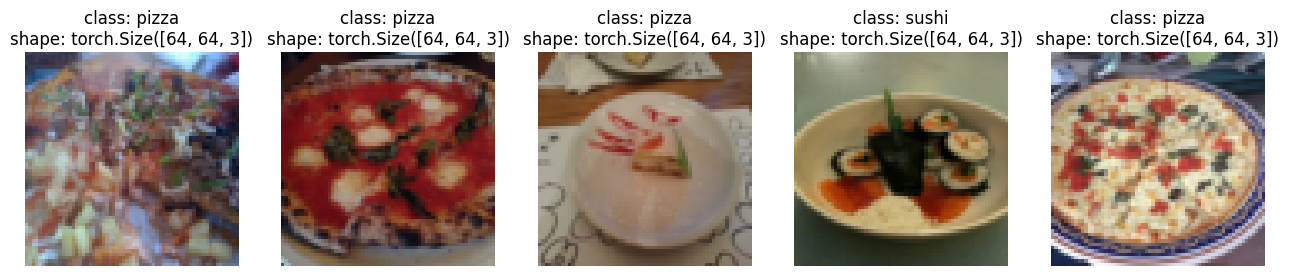

In [130]:
display_random_image(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

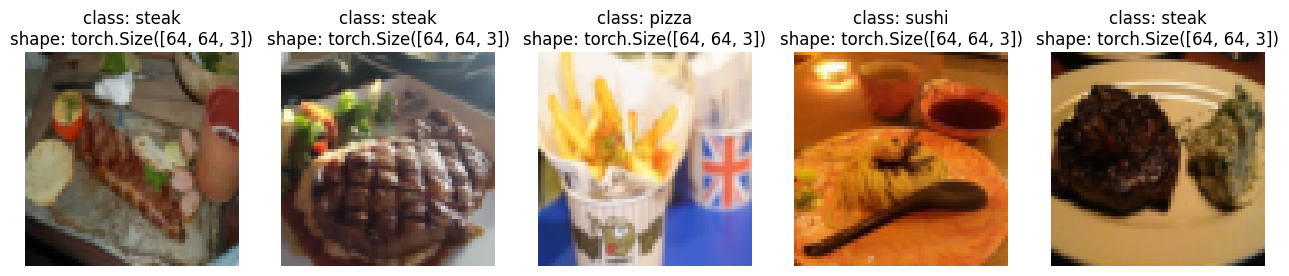

In [131]:
display_random_image(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

In [132]:
from torch.utils.data import Dataset,DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1,
                                    num_workers=0,
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x77fce9a83bb0>,
 <torch.utils.data.dataloader.DataLoader at 0x77fce9b27700>)

In [133]:
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [134]:
simple_transforms = transforms.Compose(
    [transforms.Resize((64,64)),
    transforms.ToTensor()]
)

In [135]:
train_data_simple = datasets.ImageFolder(root=train_dir,transform=simple_transforms)
test_data_simple = datasets.ImageFolder(root=test_dir,transform=simple_transforms)

import os
from torch.utils.data import Dataset,DataLoader

BATCH_SIZE = 32
NUM_WORKERS=os.cpu_count()

print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple


Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x77fce9884a30>,
 <torch.utils.data.dataloader.DataLoader at 0x77fce9884550>)

In [136]:
class TinyVCG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_blk1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_blk2 = nn.Sequential(
            nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.clf = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self,x):
        x = self.conv_blk1(x)
        x = self.conv_blk2(x)
        x = self.clf(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)
model_0 = TinyVCG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0


TinyVCG(
  (conv_blk1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_blk2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (clf): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [137]:
img_batch,label_batch = next(iter(train_dataloader_simple))
img_single,label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")


model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

print(f"Output logits: {pred}")
print(f"Output pred prob: {torch.softmax(pred,dim=1)}")
print(f"Output pred label: {torch.argmax(torch.softmax(pred,dim=1),dim=1)}")
print(f"Actual label: {label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits: tensor([[0.0578, 0.0634, 0.0351]])
Output pred prob: tensor([[0.3352, 0.3371, 0.3277]])
Output pred label: tensor([1])
Actual label: 2


In [138]:
!pip install torchinfo

In [139]:
from torchinfo import summary
summary(model_0,input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVCG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [140]:
def train_step(model,dataloader,loss_fn,optimizer):
    model.train()
    train_loss,train_acc = 0,0
    for batch,(X,y) in enumerate(dataloader):
        X,y = X.to(device),y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss,train_acc


In [141]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [142]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [143]:
import torch
import torch.nn as nn
from timeit import default_timer as timer

def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs):
    for epoch in range(epochs):
        start_time = timer()
        train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer)
        test_loss, test_acc = test_step(model, test_dataloader, loss_fn)
        end_time = timer()

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}, Time: {end_time-start_time:.2f} seconds")

# Define your model, loss function, optimizer, and other parameters
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5
model_0 = TinyVCG(3, 10, len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Train model_0
start_time = timer()
train(model=model_0,
      train_dataloader=train_dataloader_simple,
      test_dataloader=test_dataloader_simple,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


Epoch 1/5, Train Loss: 1.1078, Train Acc: 0.2578, Test Loss: 1.1362, Test Acc: 0.2604, Time: 1.80 seconds
Epoch 2/5, Train Loss: 1.0846, Train Acc: 0.4258, Test Loss: 1.1622, Test Acc: 0.1979, Time: 1.40 seconds
Epoch 3/5, Train Loss: 1.1153, Train Acc: 0.2930, Test Loss: 1.1696, Test Acc: 0.1979, Time: 1.97 seconds
Epoch 4/5, Train Loss: 1.0988, Train Acc: 0.4141, Test Loss: 1.1344, Test Acc: 0.1979, Time: 2.40 seconds
Epoch 5/5, Train Loss: 1.0990, Train Acc: 0.2930, Test Loss: 1.1434, Test Acc: 0.1979, Time: 1.97 seconds
Total training time: 9.543 seconds


In [146]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVCG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch 1/5, Train Loss: 1.1078, Train Acc: 0.2578, Test Loss: 1.1362, Test Acc: 0.2604, Time: 2.02 seconds
Epoch 2/5, Train Loss: 1.0846, Train Acc: 0.4258, Test Loss: 1.1622, Test Acc: 0.1979, Time: 2.32 seconds
Epoch 3/5, Train Loss: 1.1153, Train Acc: 0.2930, Test Loss: 1.1696, Test Acc: 0.1979, Time: 1.85 seconds
Epoch 4/5, Train Loss: 1.0988, Train Acc: 0.4141, Test Loss: 1.1344, Test Acc: 0.1979, Time: 1.60 seconds
Epoch 5/5, Train Loss: 1.0990, Train Acc: 0.2930, Test Loss: 1.1434, Test Acc: 0.1979, Time: 1.17 seconds
Total training time: 8.970 seconds
